In [1]:
import pandas as pd

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
df_brl = pd.read_parquet('../data/all_comm/comm_brl.parquet')
df_usd = pd.read_parquet('../data/all_comm/comm_usd.parquet')

In [4]:
Y_df_brl = df_brl.groupby('unique_id').tail(24)
X_df_brl = df_brl.drop(Y_df_brl.index, axis = 0)

In [5]:
X_df_brl.head()

,ds,y,unique_id
0,2003-05-01,28.156667,ACUCAR
1,2003-06-01,25.092000,ACUCAR
2,2003-07-01,23.928636,ACUCAR
3,2003-08-01,29.410000,ACUCAR
4,2003-09-01,24.313636,ACUCAR


In [6]:
from statsforecast import StatsForecast

from statsforecast.models import (
    Naive,
    AutoARIMA
)

/home/matt/anaconda3/envs/smp-commodities/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
models = [
    Naive(),
    AutoARIMA(season_length=12)
]

In [8]:
sf = StatsForecast( 
    models=models,
    freq='ME',
)

In [9]:
forecasts = sf.forecast(df=X_df_brl, h=24, fitted=True)
forecasts.head(24)

,unique_id,ds,Naive,AutoARIMA
0,ACUCAR,2023-02-28,132.086667,132.842509
1,ACUCAR,2023-03-31,132.086667,133.240550
2,ACUCAR,2023-04-30,132.086667,132.437484
3,ACUCAR,2023-05-31,132.086667,131.999036
4,ACUCAR,2023-06-30,132.086667,132.107682
5,ACUCAR,2023-07-31,132.086667,132.705892
6,ACUCAR,2023-08-31,132.086667,132.880001
7,ACUCAR,2023-09-30,132.086667,133.598583
8,ACUCAR,2023-10-31,132.086667,134.703316
9,ACUCAR,2023-11-30,132.086667,135.726111


In [10]:
insample_forecasts = sf.forecast_fitted_values()
insample_forecasts.head(10)

,unique_id,ds,y,Naive,AutoARIMA
0,ACUCAR,2003-05-01,28.156667,NaN,28.128510
1,ACUCAR,2003-06-01,25.092000,28.156667,27.770887
2,ACUCAR,2003-07-01,23.928636,25.092000,23.824496
3,ACUCAR,2003-08-01,29.410000,23.928636,24.079414
4,ACUCAR,2003-09-01,24.313636,29.410000,32.159257
5,ACUCAR,2003-10-01,21.140435,24.313636,20.113904
6,ACUCAR,2003-11-01,20.375500,21.140435,21.679392
7,ACUCAR,2003-12-01,21.424500,20.375500,19.691115
8,ACUCAR,2004-01-01,19.659524,21.424500,22.330977
9,ACUCAR,2004-02-01,18.176111,19.659524,18.222120


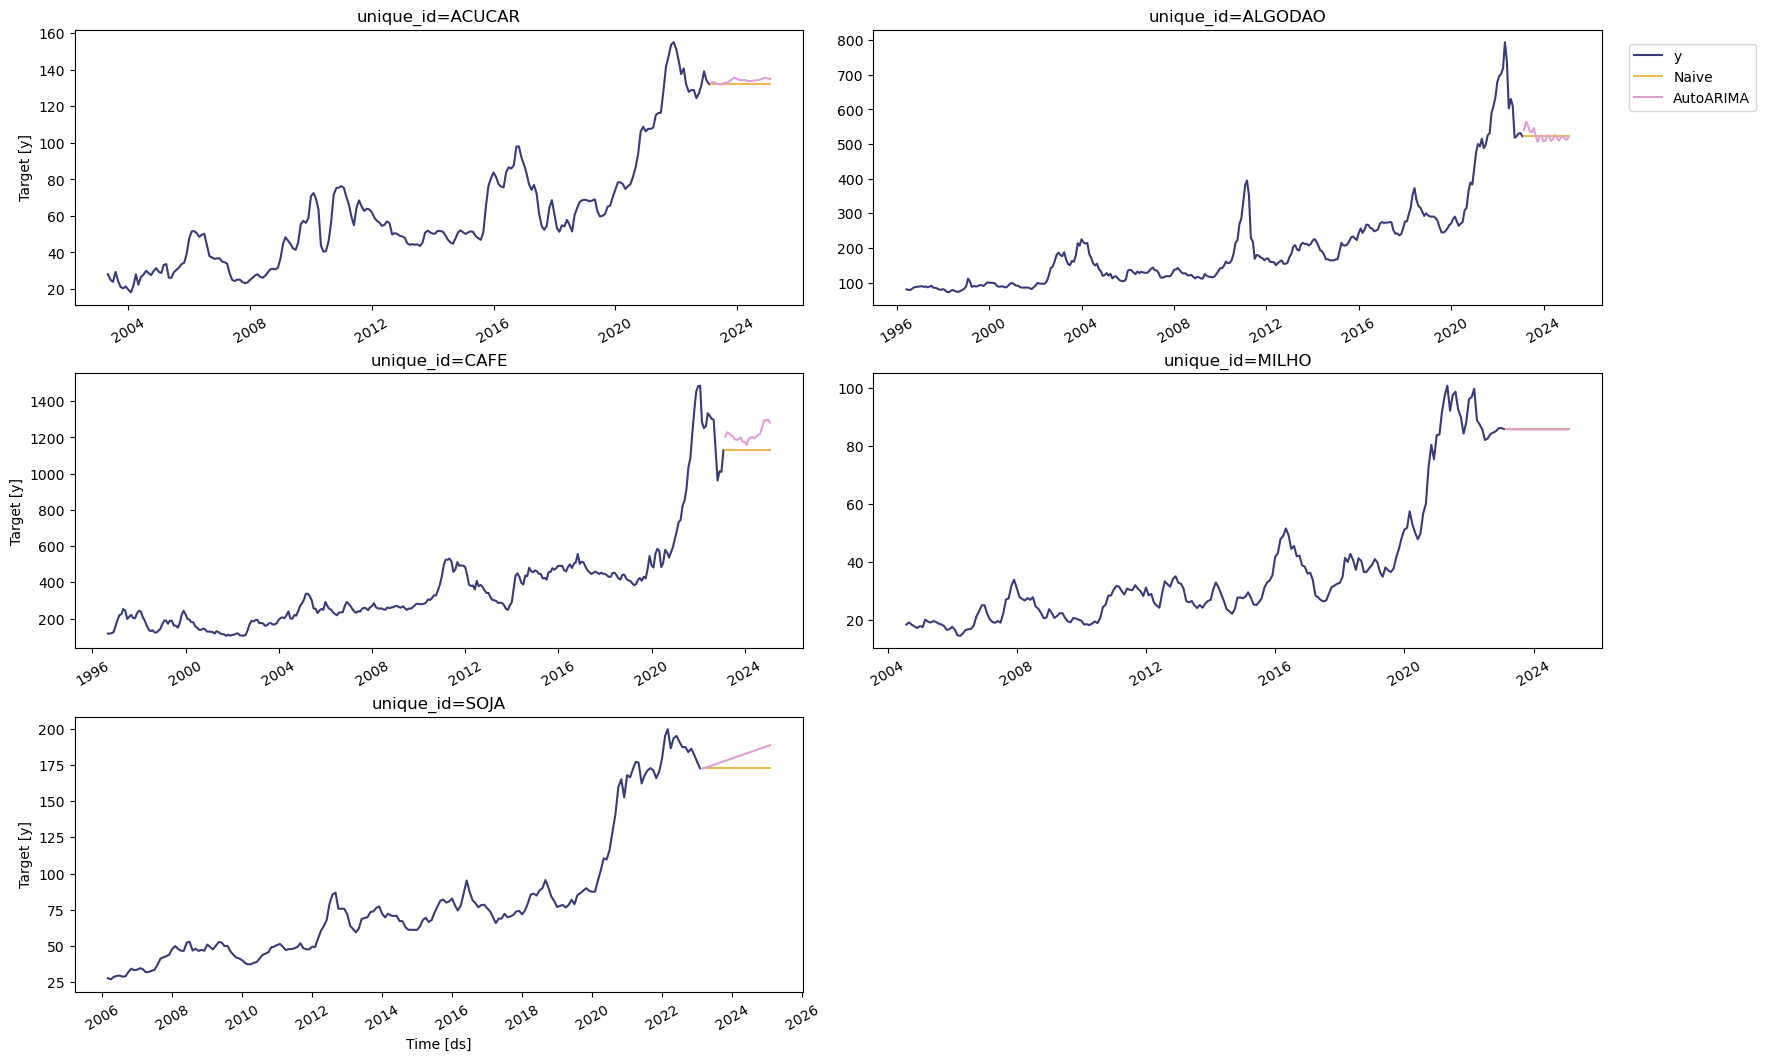

In [11]:
sf.plot(X_df_brl,forecasts)